# Braintracer Cell Analysis
Braintracer extends the functionality of cellfinder and brainreg. It takes the downsampled data, registered atlas, and positive cell coordinates, scales them down to downsampled space and assigns them to corresponding atlas brain areas, cleanly displaying the results from multiple datasets.

In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bt.debug = False # False by default
bt.grouped = True # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features
bt.starter_ch1 = True # True - starter cells (postsynaptics) in ch1; False - ch2; None - sum both channels
bt.fluorescence = False
# normalisation: 'presynaptics', 'postsynaptics', or 'ch1'
# orientation: 'frontal', 'sagittal', 'horizontal' or a tuple (x,y,z)
# poster plotting: plt.style.use('seaborn-poster')

In [3]:
# provide the name, group, cell channels, background channel
# LOW CELL COUNTS TO BE EXCLUDED FOR PROBABILITY MAPS: FR195, FR197, FR198, FR209, FR210, SC017, SC028, SC034
## EXCLUDED
bt.network_name = 'Unet'
#bt.Dataset('FR195', 'LS', 'r', 'g');
#bt.Dataset('FR211', 'LS', 'r', 'g'); # CANNOT RUN; has zero cells
#bt.Dataset('SC002', 'LS', 'r', 'g', atlas_25=True);
#bt.Dataset('SC004', 'LS', 'r', 'g'); # CANNOT RUN; never ran cellfinder
bt.network_name = 'bt14' # default is Unet
#bt.Dataset('SC017', 'LS', 'r', 'g');
#bt.Dataset('FR198', 'LS', 'r', 'g', 15);
#bt.Dataset('FR209', 'LS', 'r', 'g', 59);
#bt.Dataset('FR210', 'LV', 'r', 'g', 291);
#bt.Dataset('SC028', 'LS', 'r', 'b');
#bt.Dataset('SC029', 'LS', 'r', 'b');
#bt.Dataset('SC034', 'LS', 'r', 'b');
## INCLUDED
bt.network_name = 'Unet' # datasets which haven't been analysed yet with bt14
#bt.Dataset('FR208', 'LV', 'r', 'g');
#bt.Dataset('SC005', 'LS', 'r', 'g');
bt.network_name = 'bt14' # default is Unet
bt.Dataset('SC003', 'LS', 'r', 'g', 229, atlas_25=True);
bt.Dataset('SC009', 'LS', 'r', 'b');
bt.Dataset('FR200', 'LS', 'r', 'g', 1102); # still terrible
bt.Dataset('FR197', 'LV', 'r', 'g'); # needs manual count
bt.Dataset('FR199', 'LV', 'r', 'g', 477);
bt.Dataset('SC001', 'LV', 'r', 'g', 336, atlas_25=True);
bt.Dataset('SC006', 'LV', 'r', 'g', 242);
bt.Dataset('SC007', 'LS', 'r', 'b'); # actually might have MFs
bt.Dataset('SC008', 'LS', 'r', 'b');
bt.Dataset('SC010', 'LS', 'r', 'b'); # CHANGED from human-defined LV
bt.Dataset('SC011', 'LS', 'r', 'b')#, 202);
bt.Dataset('SC012', 'LV', 'r', 'b');
bt.Dataset('SC016', 'LV', 'r', 'b');
bt.Dataset('SC018', 'LV', 'r', 'b')#, 278);
bt.Dataset('SC027', 'LV', 'r', 'b');
bt.Dataset('SC030', 'LS', 'r', 'b');
bt.Dataset('SC031', 'LV', 'r', 'b');
title = '_'.join([i.name for i in bt.datasets])

## Image Stack Functions

In [1]:
bt.datasets[0].show_coronal_section(slice_frac=(5,2751), cells_pm=5)
#btf.save('FR210_coronal_section', as_type='png')

NameError: name 'bt' is not defined

In [2]:
dataset = bt.datasets[0]
btp.generate_brain_overview(dataset, top_down=False, vmin=4)
#btf.save(f'{dataset.name}_horizontal', as_type='png')
# show the raw image stack projection, top_down gives orientation

NameError: name 'bt' is not defined

## 3D Spatial Binning

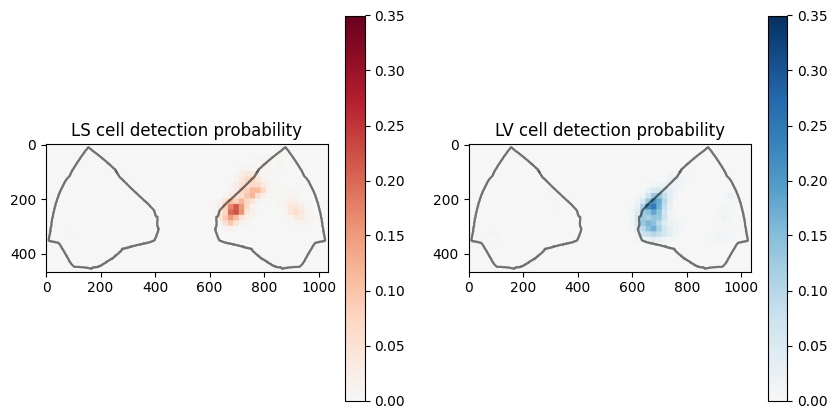

In [52]:
# 294 SCm, 302 SCs, 701 VNC, 549 TH, 795 PAG, 528 CBX, 128 MRN, 1048 GRN, 477 STR, 31 ACA, 672 CP, 771 P, 500 MO, 453 SS
btp.bin_3D_show(area_num=453, binsize=200, axis=1, sigma=1, projcol='k', vlim=0.35)
#btf.save('SS_proj_coronal', as_type='pdf') # call them coronal (2), horizontal (1), or sagittal (0)
# detection probability map projection

Bins of last dataset: (115, 81, 133), average number of bins containing cells: 1.9411764705882353
607744 voxels removed by threshold=0, unless showing correlation matrix.


C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:203: SyntaxWarning: "is" with a literal. Did you mean "=="?
  projection = projection.T if axis is 0 else projection # side-on orientation does not need axis swapping
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:246: SyntaxWarning: "is" with a literal. Did you mean "=="?
  av_im = av_im if axis is 0 else av_im.T # side-on orientation does not need axis swapping
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:203: SyntaxWarning: "is" with a literal. Did you mean "=="?
  projection = projection.T if axis is 0 else projection # side-on orientation does

FloatingPointError: NaN dissimilarity value.

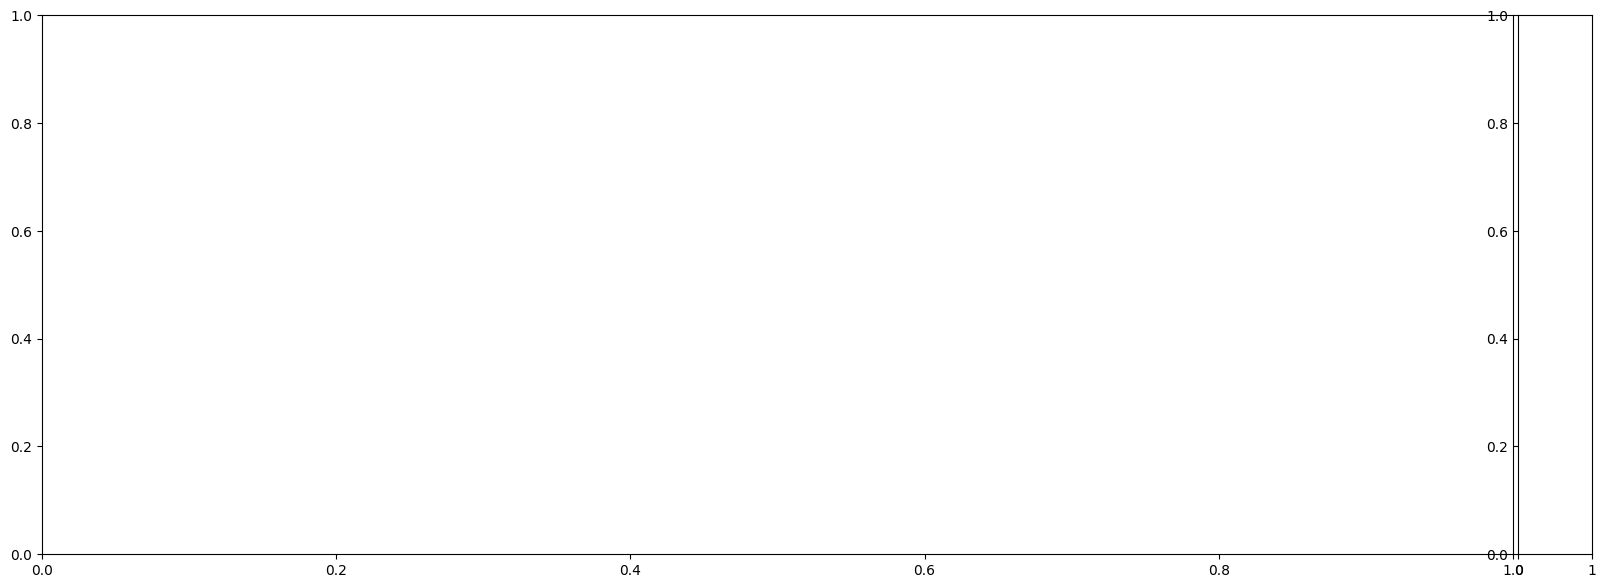

In [47]:
btp.bin_3D_matrix(549, binsize=100, aspect='auto', vbounds=(0,1), sigma=4, threshold=0, cmap='gray', order_method='average', blind_order=True, covmat=True, figsize=(20,7))
# BIN INTO VOXELS
# this function is slightly complicated because it can make multiple different plots
# count matrix: covmat=False. only need aspect, vbounds, threshold, cmap, and figsize.
# correlation matrix: covmat=True. set area_num to correlate one region, None for whole brain. Sorting: set order_method e.g. 'average', set blind_order to determine if supervised with site label, set override_order to order by another matrix's order regardless of other sorting parameters

1129 [1097, 549, 290, 797]
313 [323, 128, 795, 294, 10, 17]
688 [500, 453, 985]
354 [379, 370, 386, 230, 1048, 136, 235, 307, 395, 938, 852, 701, 720, 651, 437, 955, 1098, 1107, 978, 202, 225, 711]
771 [1117, 987, 146, 1093]


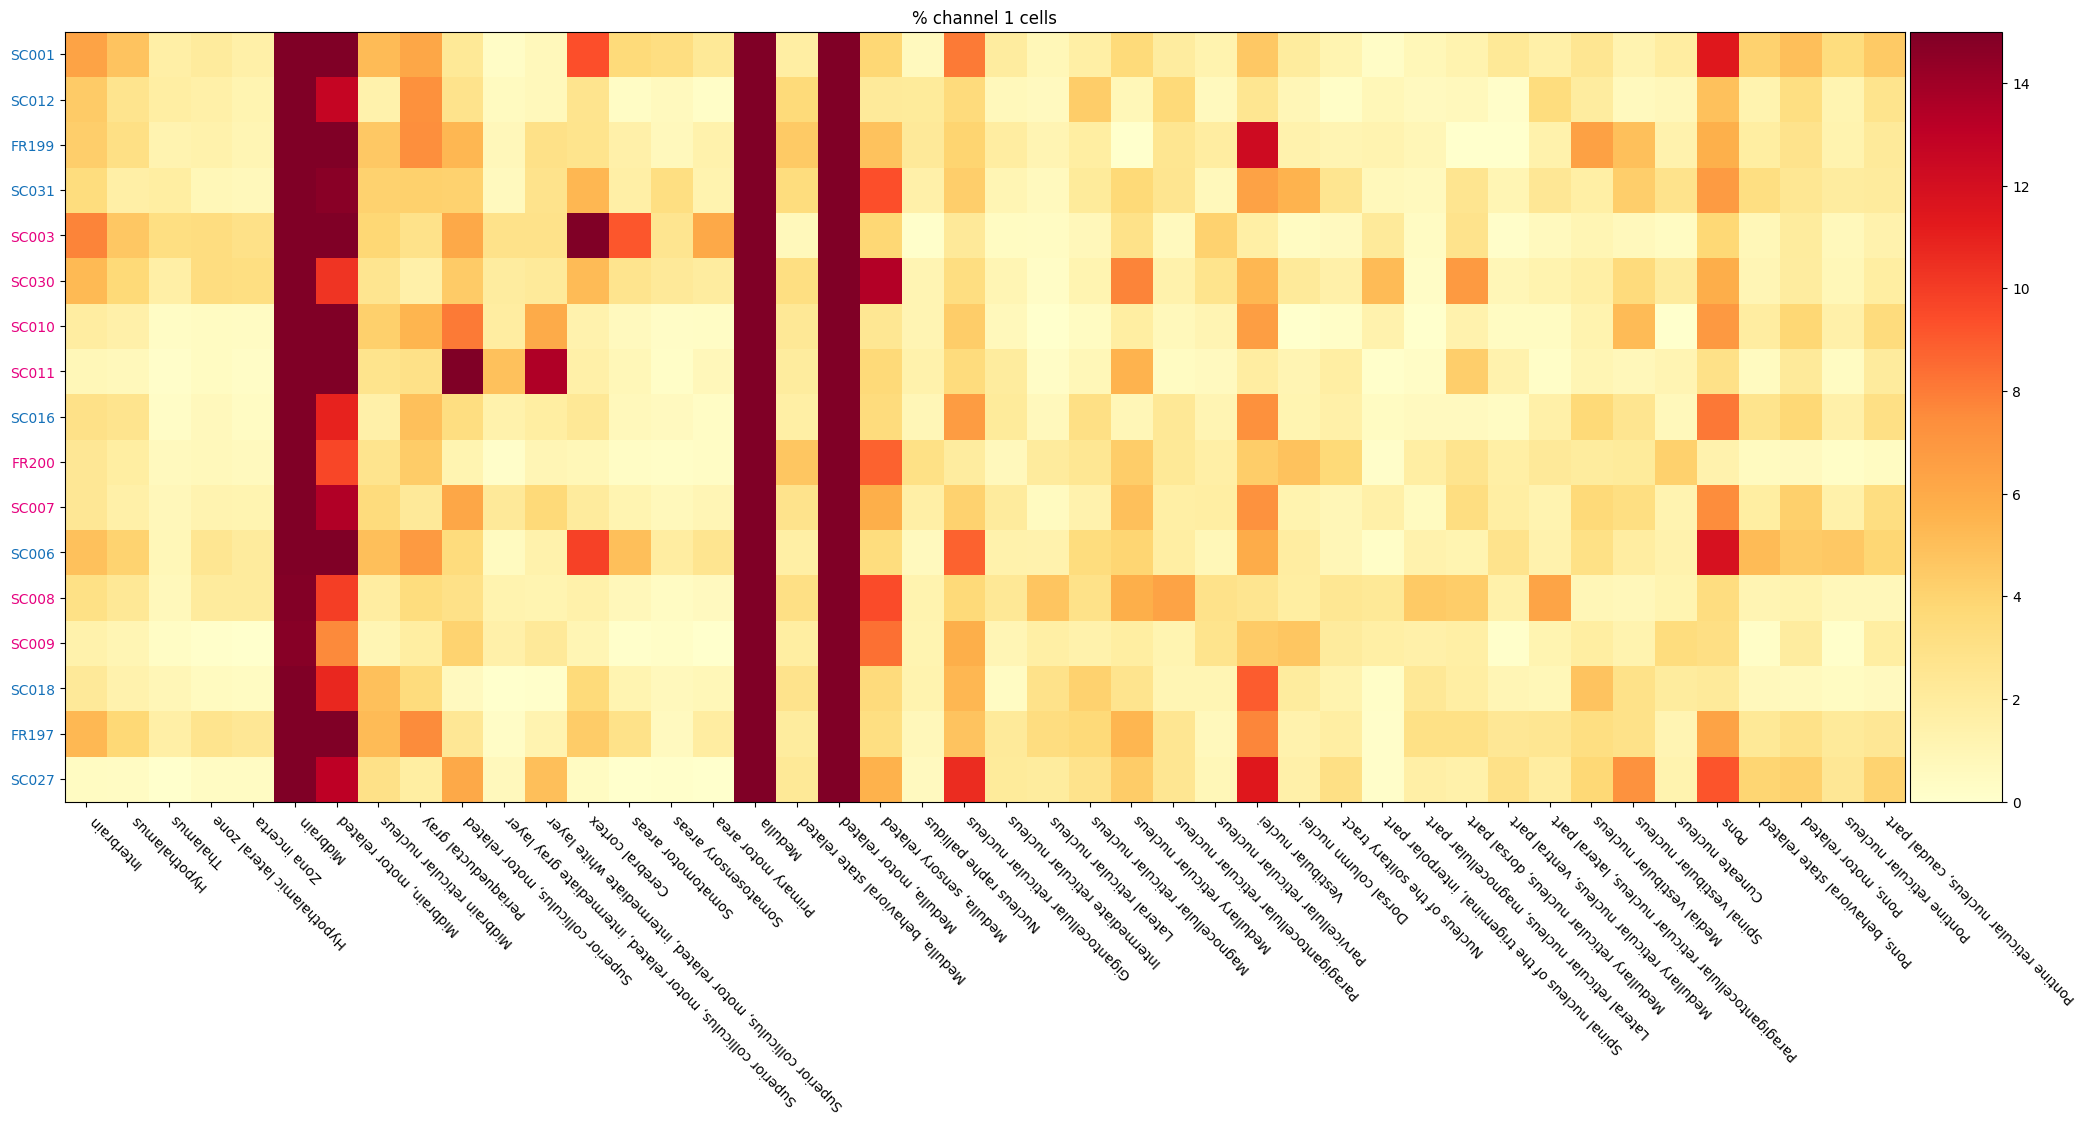

In [26]:
parent, children = bt.children_from('CB', depth=0)
children = np.array(children)
children = np.append(children, [512, 8, 1009, 960, 728, 83]) # big areas + IO
children = np.append(children, [567, 695, 315]) # duplicate cerebral cortex regions
children = np.append(children, [343, 1065]) # remove areas that inherit everything, e.g. brainstem
btp.generate_matrix_plot(threshold=1, ignore=children, vbounds=(0,15), normalisation='ch1', override_order=[10, 12, 9, 16, 0, 7, 5, 6, 13, 2, 3, 11, 4, 1, 14, 8, 15], covmat=False, rowvar=1, zscore=False, cmap='YlOrRd', figsize=(25,10), aspect='auto')
#btf.save('matrix_whole_brain_areas_unsupervised', as_type='pdf')
# BIN INTO REGIONS
# count matrix: covmat=False. threshold selects regions by minimum, ignore=[] regions to exclude, normalisation ['postsynaptics':per starter, 'ch1':% all, None:#cells], rowvar selects variable on x/y axis
# correlation matrix: covmat=True.

## General Functions

In [6]:
bt.get_area_info(['IO'], bt.datasets[0].ch1_cells_by_area)
# get information about an individual region

(['Inferior olivary complex'], [83], [4])

In [5]:
bt.datasets[0].num_cells(ch1=True)
# total cells in a dataset

1955

In [68]:
sum_cells = 0
for dataset in bt.datasets:
    sum_cells = sum_cells + bt.get_area_info('SNc', dataset.ch1_cells_by_area)[2][0]
sum_cells / len(bt.datasets)
# mean number of cells in an area

1.4545454545454546

View results in braintracer/TRIO.


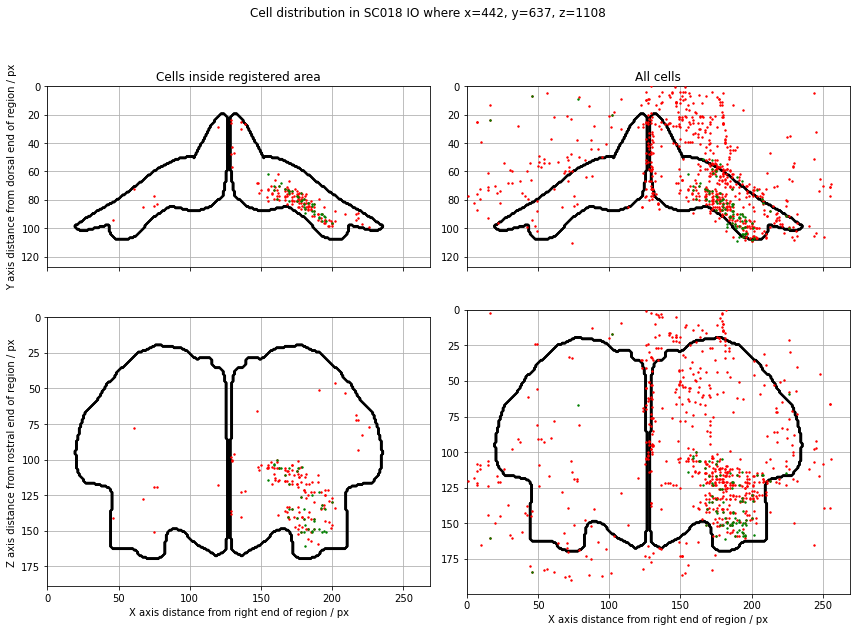

In [4]:
btp._generate_starter_validation_plot(padding=20)
# confirm where cell detections are in the starter region of each imported dataset

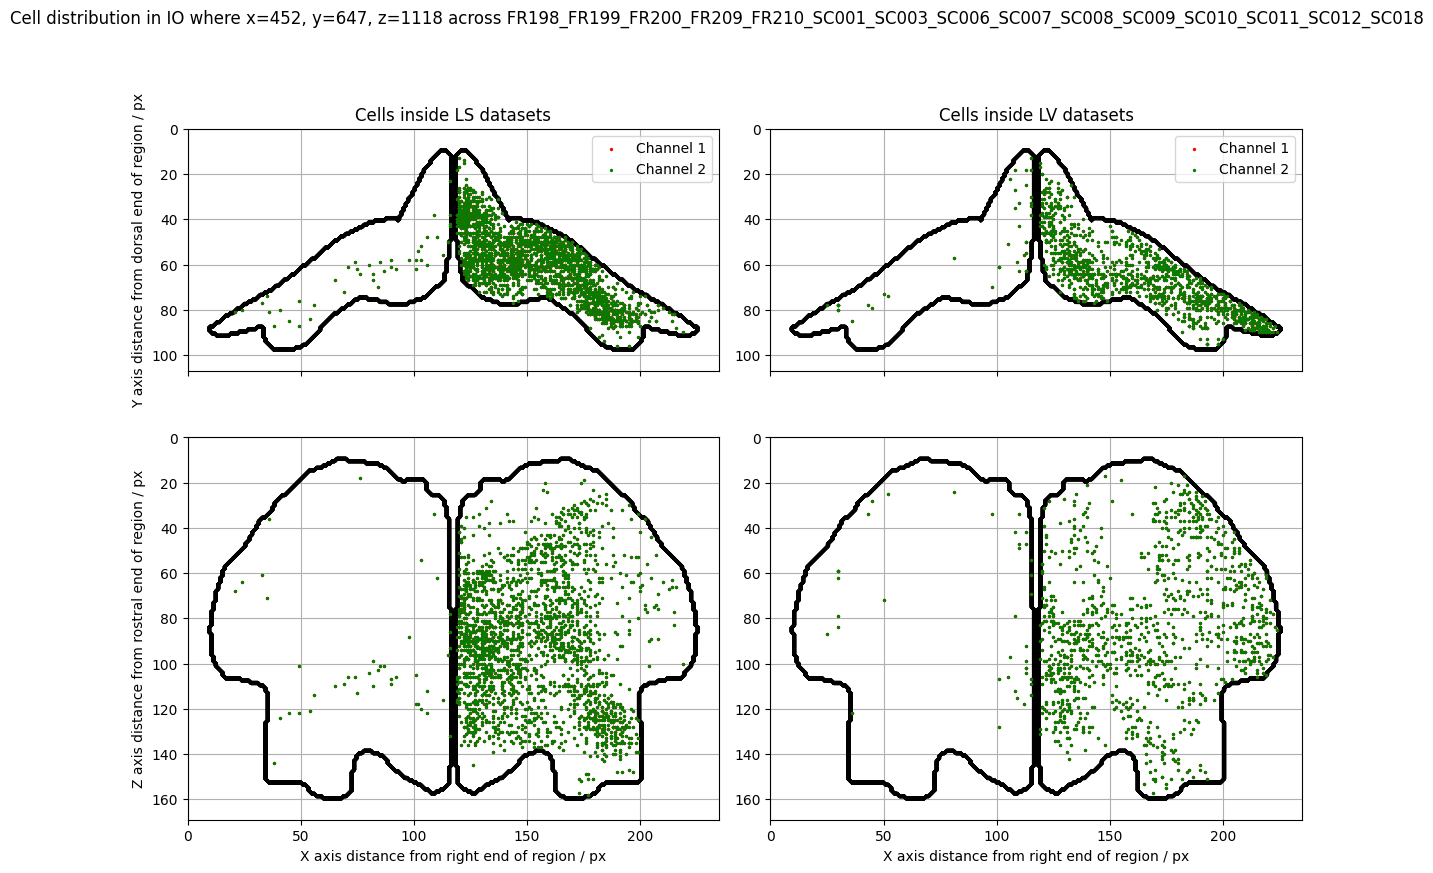

In [35]:
btp.generate_projection_plot('IO')
#btf.save(f'IO_projection_{title}', as_type='png')
# plot all cell coordinates by group in area

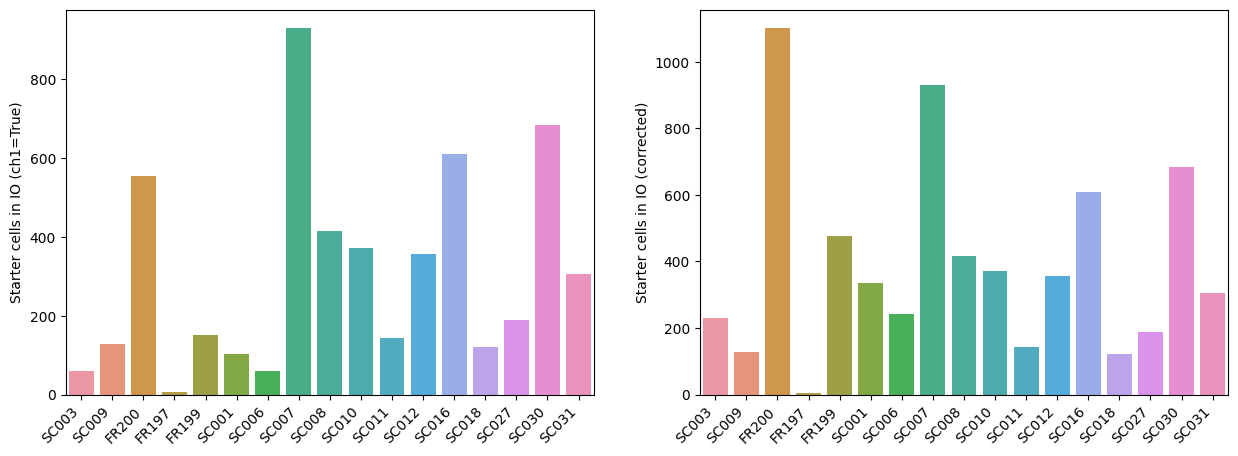

In [4]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
f.set_facecolor('white')
btp.generate_starter_cell_plot(ax=ax1, true_only=True)
btp.generate_starter_cell_plot(ax=ax2)
# plot the number of starter cells across datasets

8.728823634594288 inputs per IO neuron.


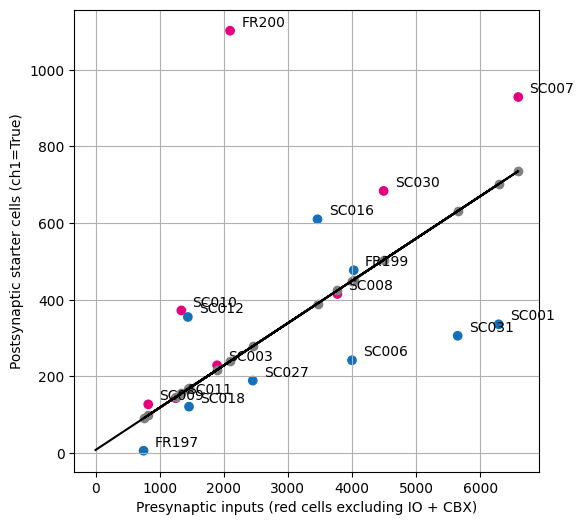

In [4]:
# IMPORTANT: this function corrects extreme starter cell counts FOR DOWNSTREAM ANALYSIS
btp.generate_starter_cell_scatter(use_manual_count=True)
#btf.save('prediction_scatter_poster', as_type='png')
# ch1 is determined by starter_ch1 in this notebook file, use_manual_count means count imported with dataset takes priority

## Cell Positions

In [ ]:
# AREA SELECTIONS TO CHOOSE FROM
sfn_areas = ['MDRN','SCm','MRN','GRN','MARN','PRNr','VTA','PAG','P']
reward = ['ORB','VTA','STRv','SNc','ACB','CS','ACA','BLA','CEA','LHA']
motor = ['MO','MOp','MOs','STRd','VAL','VENT','GPi','SNr','SCm','MY-mot','MBmot','P-mot','DORsm','ILA','PL']
sensory = ['SS','SSp','SSp-ll','SSp-ul','SSs','MY-sen','MBsen','P-sen','PSV','SCs','DORsm']
other = ['FN','IP','DN','RAmb','RM','RO','RPA','RPO','CS','LC','STN','PAG','SPFm','POL','VM','LAT','ZI']
plot1 = ['SS','MO','PAG']
motor2 = ['MOs','PAG','MRN','GRN','SCm']
basal_ganglia = ['GPi','SNr','ACB','SNc','VTA','STRv']
uchida = ['VNC','IO','GRN','MRN','DCN','STRv']
cb_interesting1 = oof = ['SPF','LHA','PAS','ND','SUV']
cb_interesting2 = ['MOB','PAS','PARN','nst','NOT','mfsbshy','AUDv1']
cb_lobules = ['SIM','AN']
cb_regions = ['FN','IP','DN','cbc','MARN','GRN','PARN','SPIV']
heatmap_6100_differences = ['MV','SCm','PAG','MRN','VNC','MDRN','RN']
heatmap_6100_sagittal = ['MOs','MEZ','GRN','MV','TRN','PG','PAL','TH','RSP','ACA','ILA','PL','STR','SCm','SCs','IC','RN','PAG','MRN','VNC','GRN','MDRN']
heatmap_11400_frontal = ['FN','IP','DN','cbc','MARN','GRN','PARN','SPIV']
heatmap_5500_frontal = ['MOp','MOs','SSp','SSp-ll','SSp-ul','SSs','CP','PVZ','PVR','MEZ','LZ','PIR','PAL'] # ,'MO','SS'
ctx_differences = ['MOp','MOs','SSp','CP']

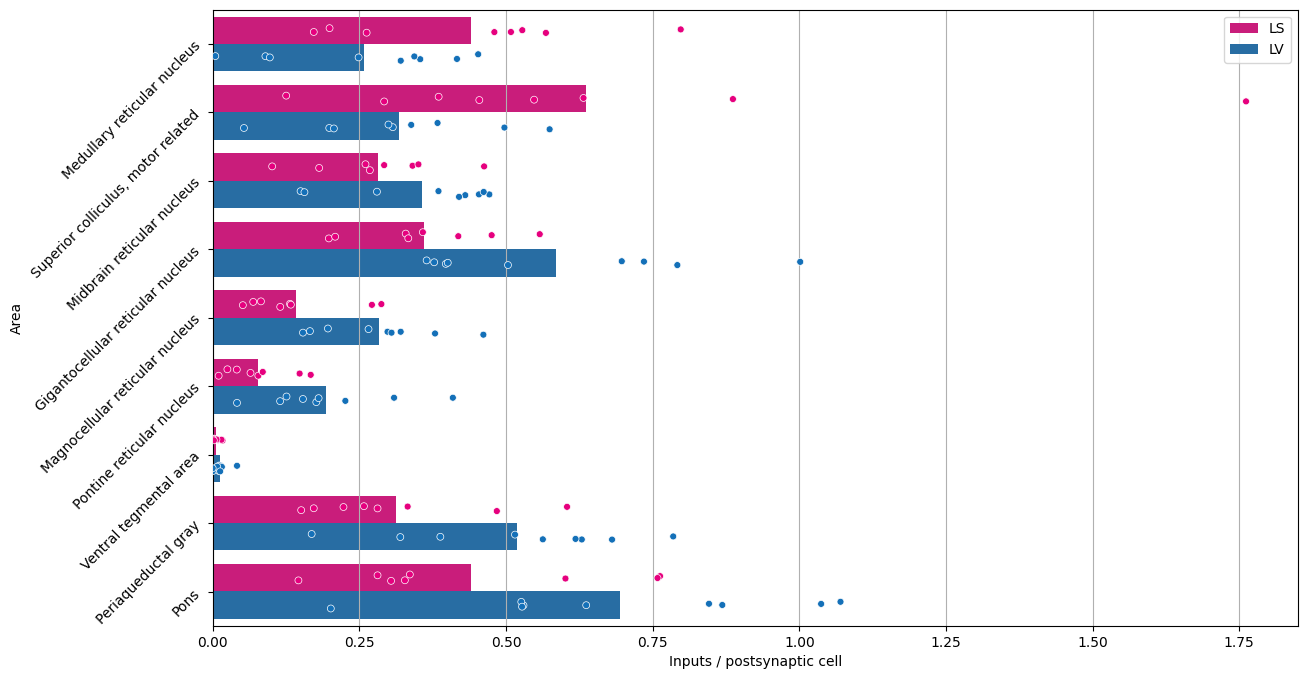

In [49]:
bt.grouped = True # False plots datasets individually, True plots as injection site groups
f, ax = plt.subplots(figsize=(14,8))
btp.generate_custom_plot(sig_areas, title='', normalisation='postsynaptics', ax=ax)
plt.yticks(rotation=45)
#btf.save(f'posterDimFrench_significant_{title}', as_type='pdf')
# PLOT HISTOGRAM OF ALL DATASETS ACROSS AREAS
# provide areas, title, normalisation ['postsynaptics':per starter, 'ch1':% all, None:#cells]

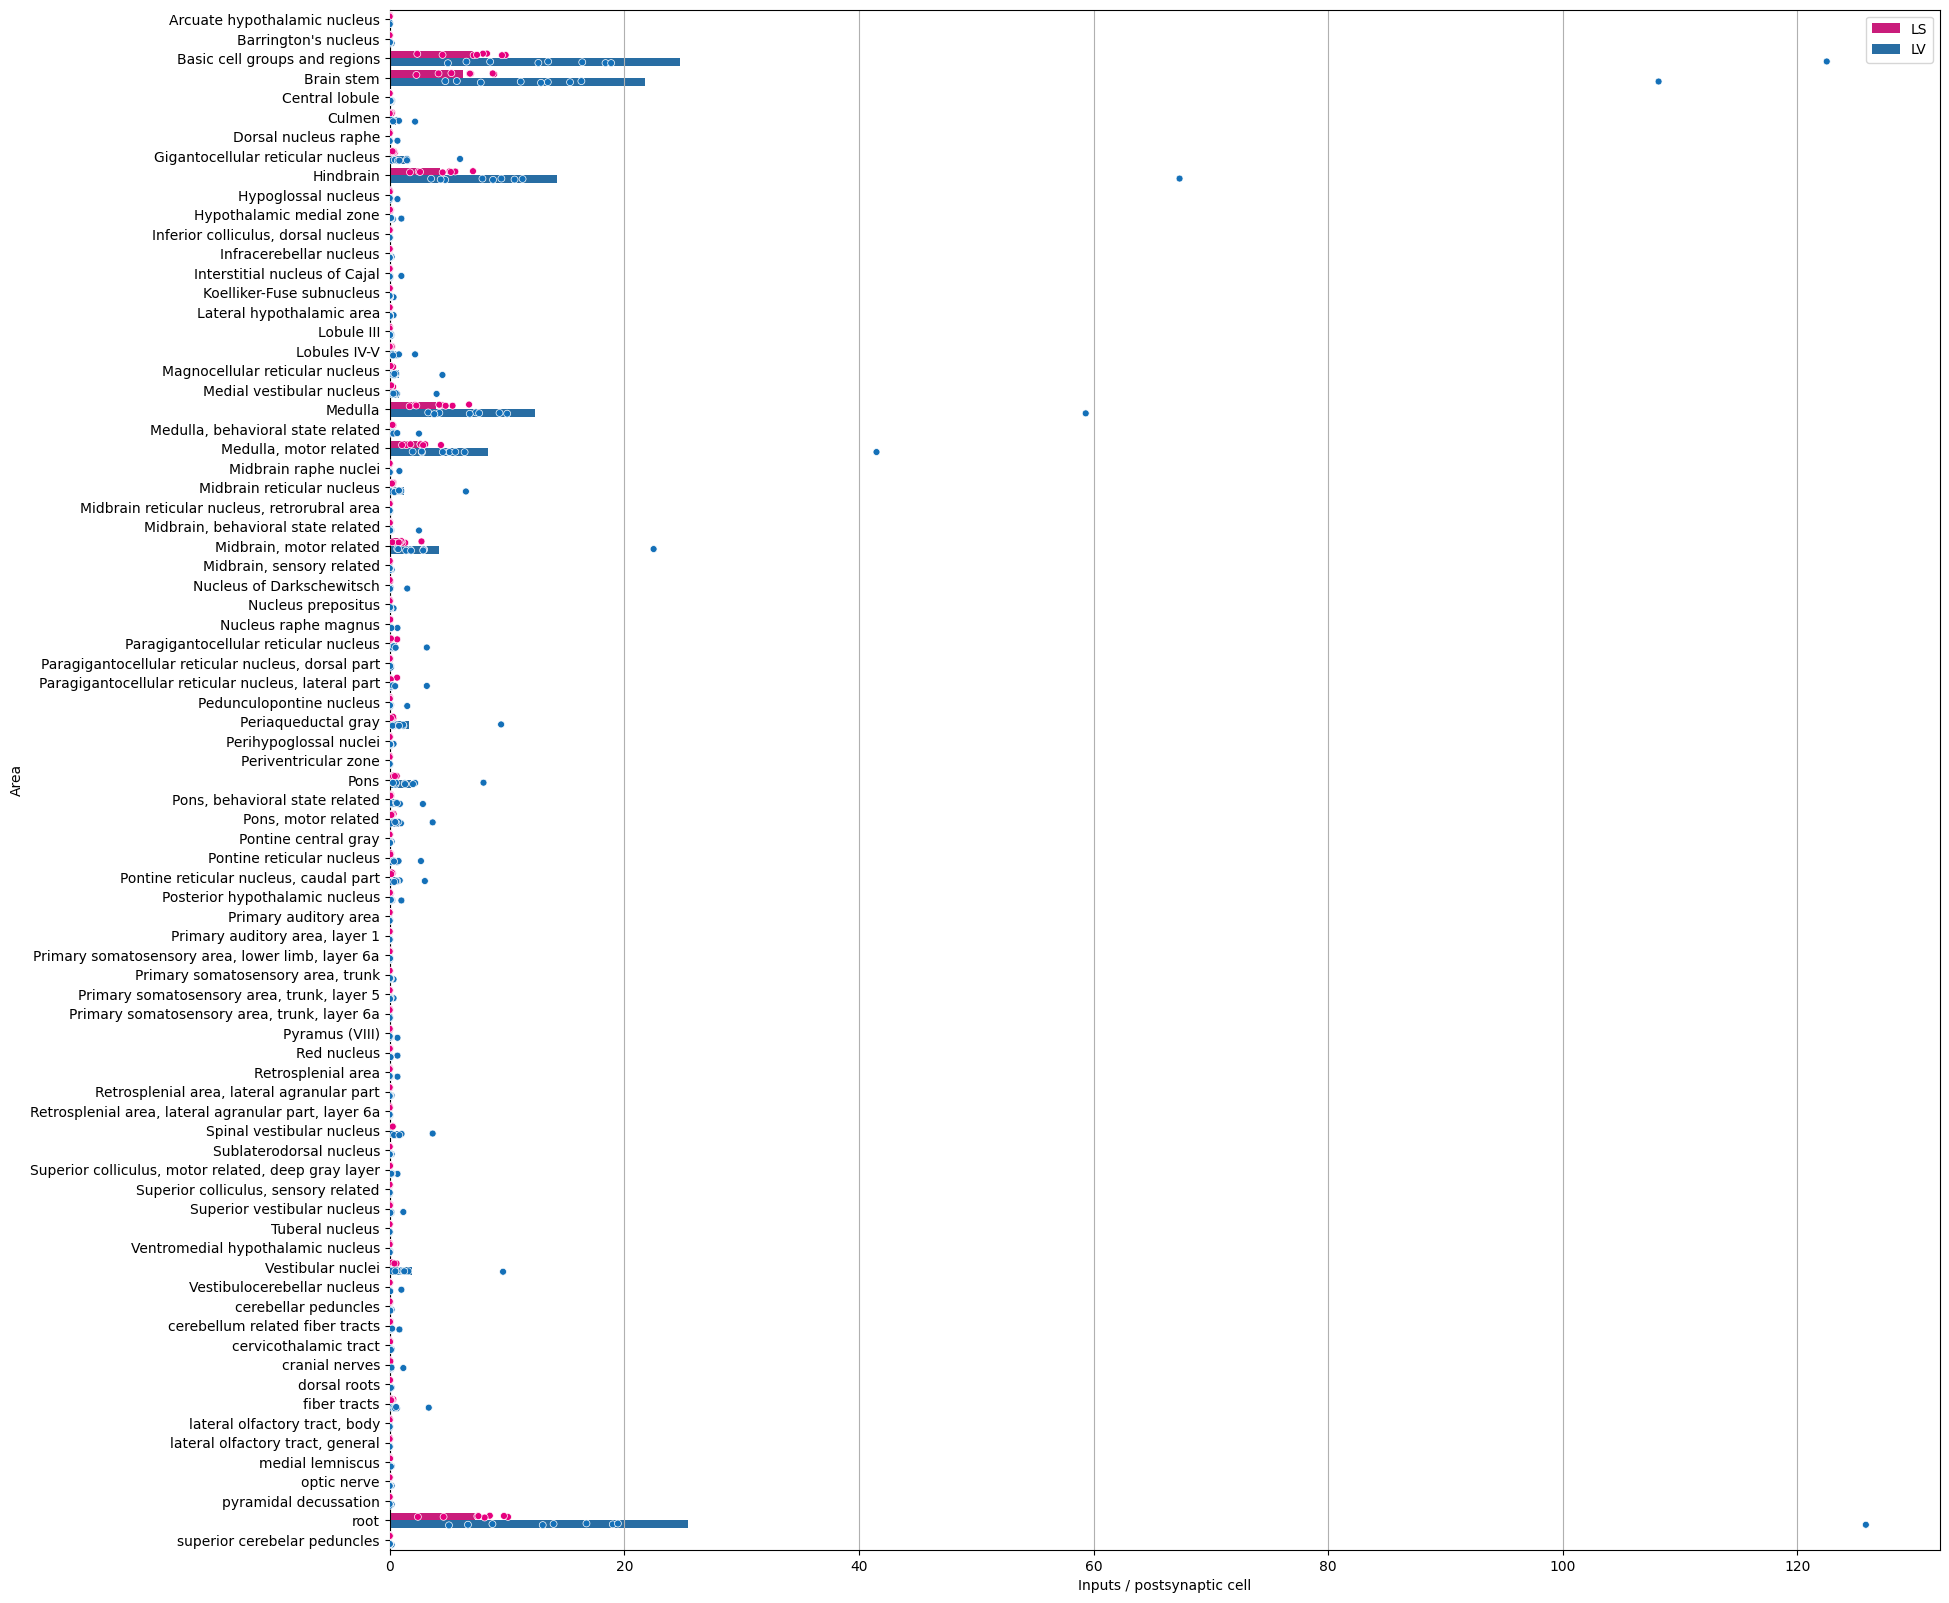

In [16]:
sig_list = [i for i in bt.area_indexes['acronym'] if bt.mwu(i)[1] < 0.05]
f, ax1 = plt.subplots(figsize=(20,20))
f.set_facecolor('white')
btp.generate_custom_plot(sig_list, title='', normalisation='postsynaptics', ax=ax1)
#btf.save(f'significant_{title}', as_type='png')
# show significantly different areas for an overview

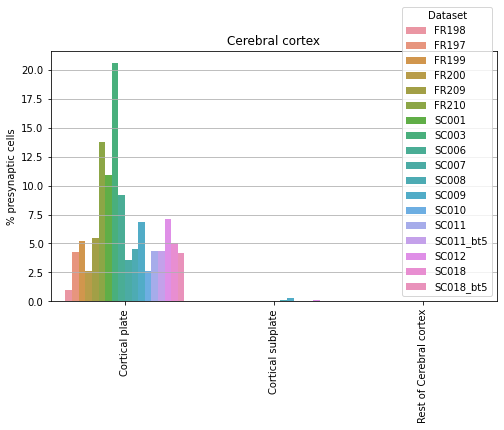

In [11]:
btp.generate_zoom_plot('Cerebral cortex', depth=1, threshold=-100)
# zoom plots show areas within a parent region at given depth(s)
# depth=0 for all children, depth=1/2/3 for specified slice through inheritance tree

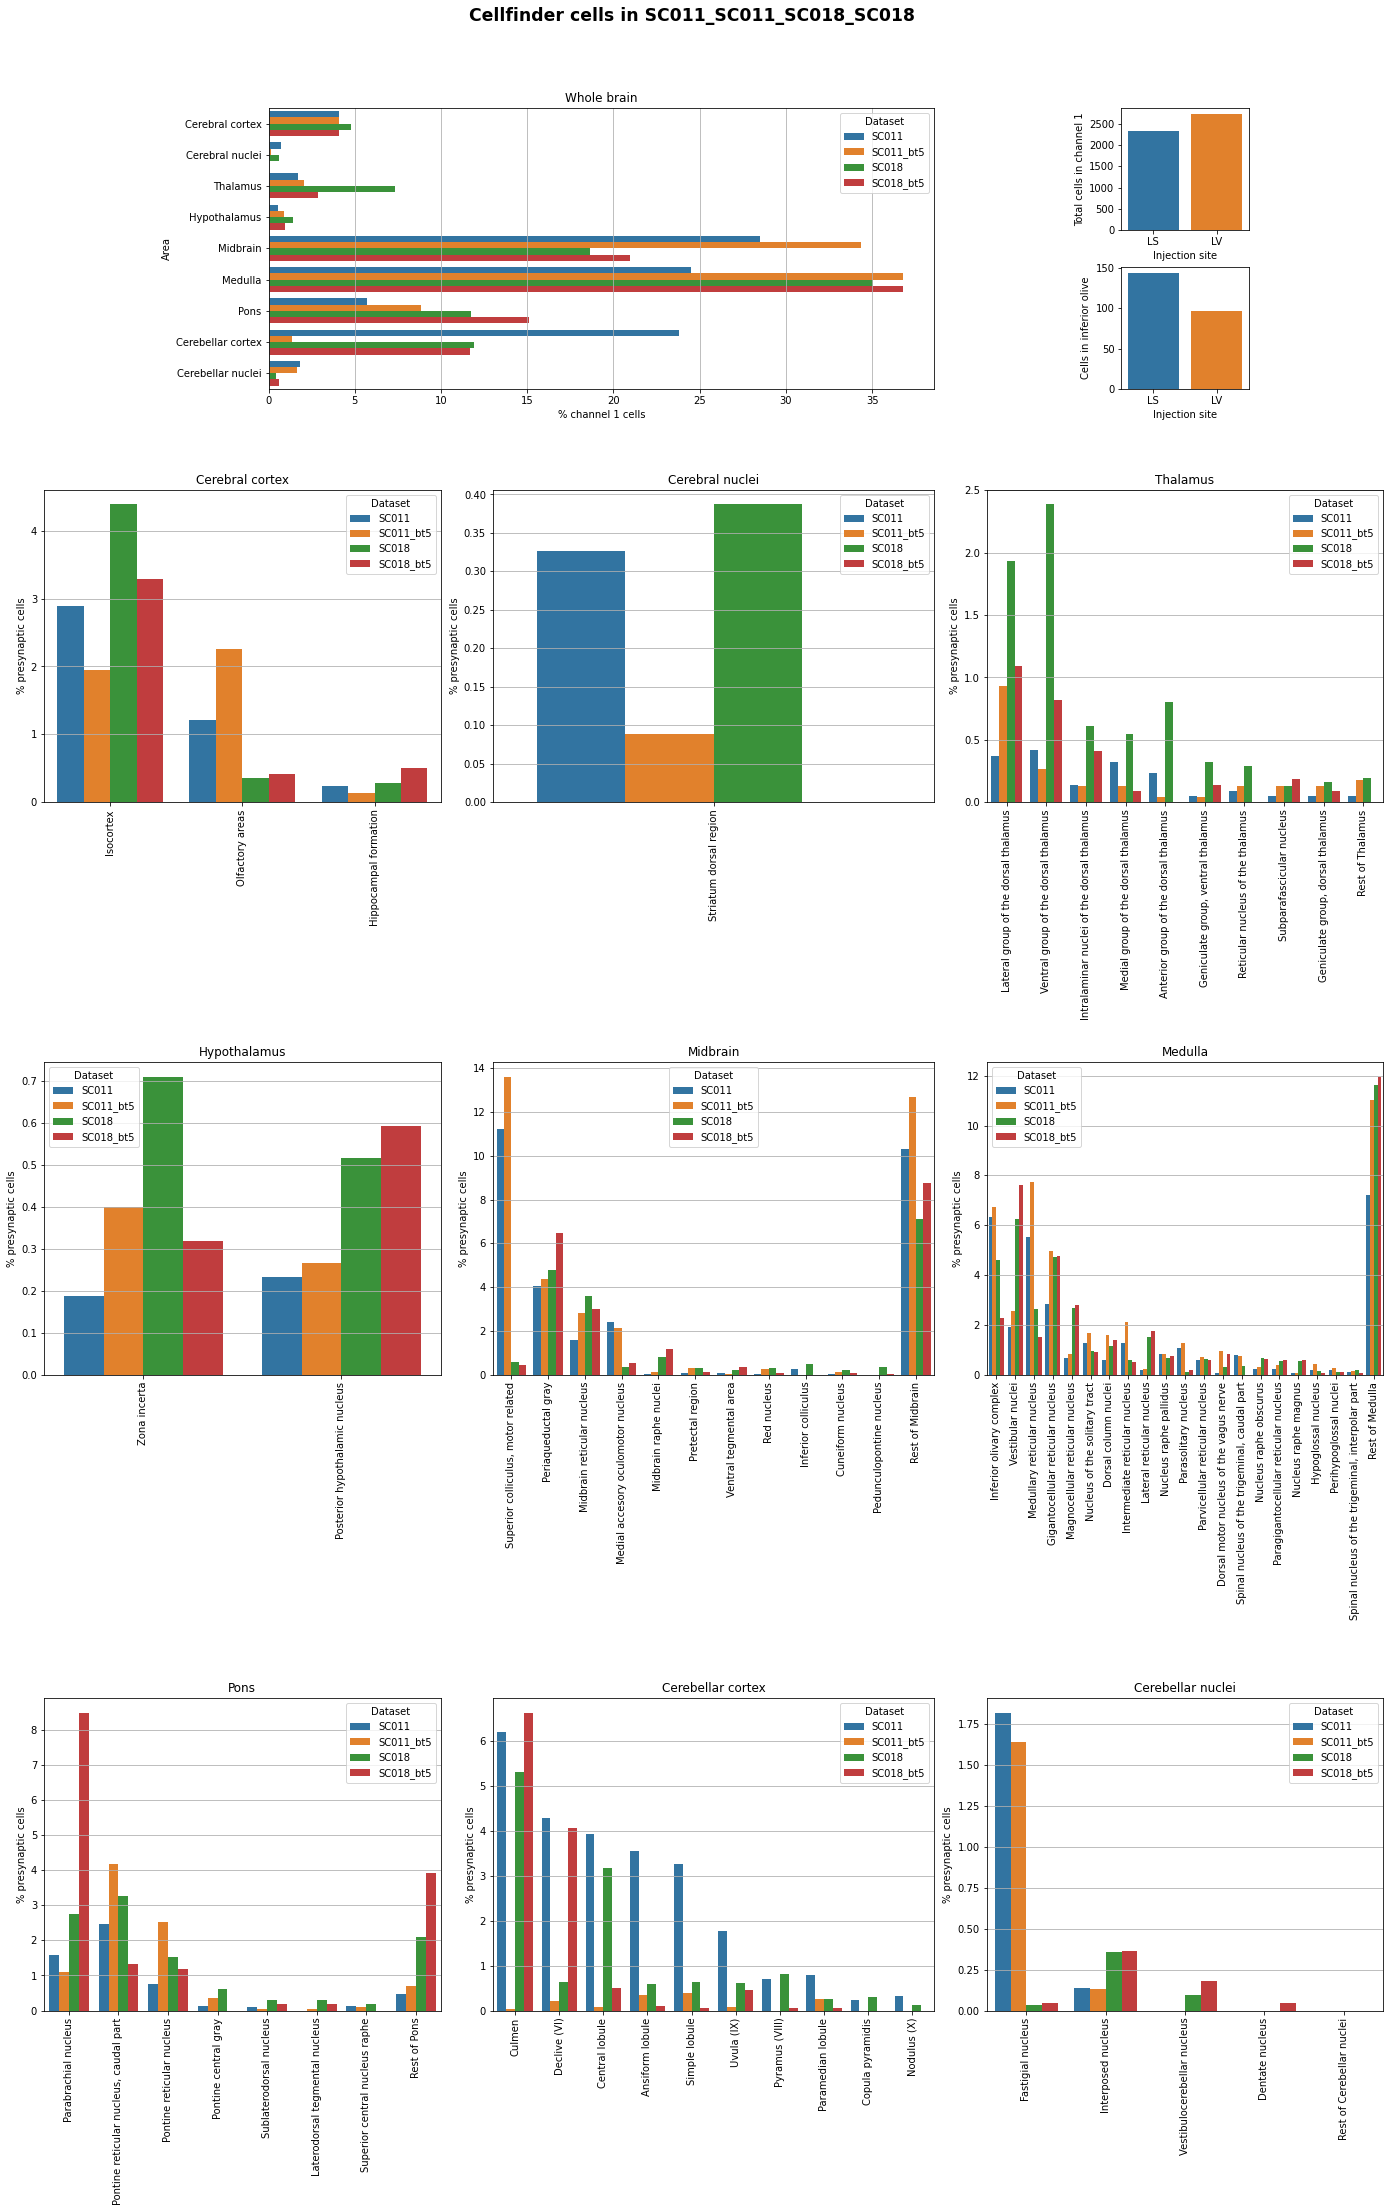

In [7]:
btp.generate_mega_overview_figure(f'Cellfinder cells in {title}')
#btf.save(f'areas_overview_{title}', as_type='png')

## Heatmaps

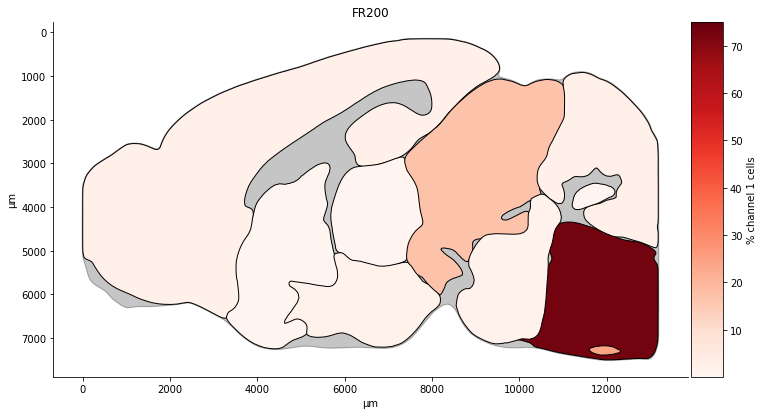

In [19]:
btp.generate_heatmap(bt.datasets[3], position=6500, vmax=75, legend=False)
#btf.save('FR200_overview_heatmap', as_type='png')
# show heatmap for one dataset

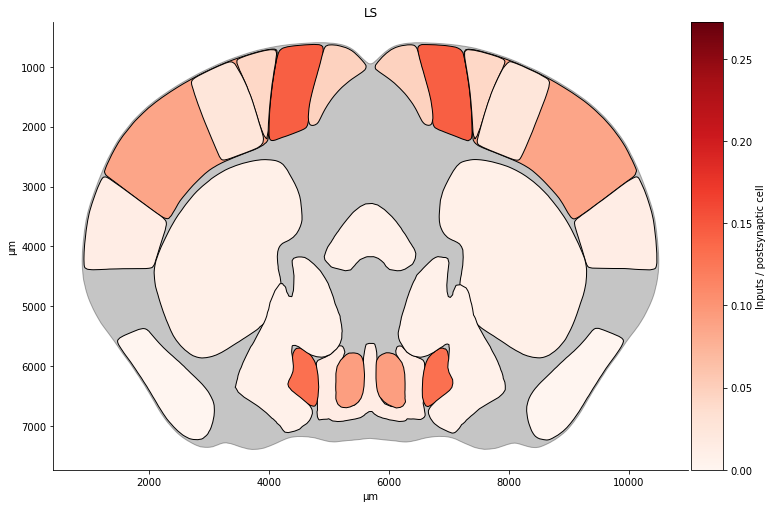

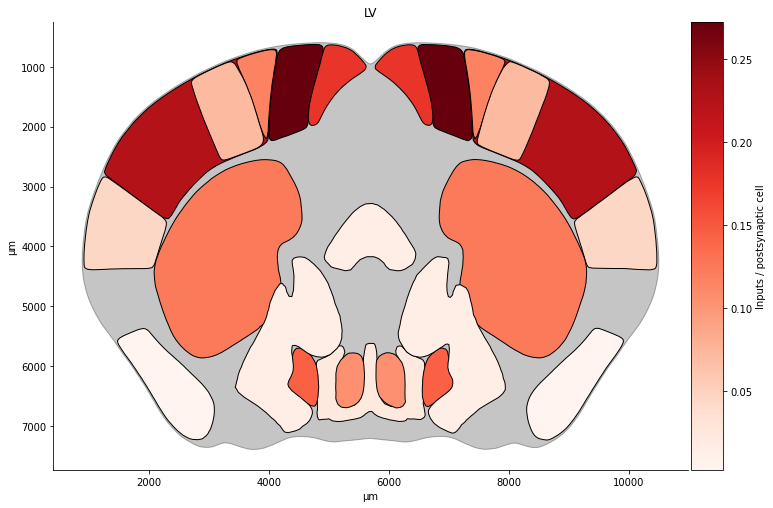

In [7]:
btp.generate_heatmap_comparison(ctx, orientation='frontal', position=5500, normalisation='postsynaptics', legend=False)
#btf.save(f'ctx_comparison_{title}', as_type='jpg')
# show heatmap of means by group

['LRNm', 'LRNp', 'MDRNd', 'MDRNv', 'AMBd', 'AMBv', 'PGRNd', 'PGRNl', 'NR', 'PRP', 'LAV', 'MV', 'SPIV', 'SUV', 'DCO', 'VCO', 'CU', 'GR', 'KF', 'SOCl', 'SOCm', 'POR', 'FF', 'LM', 'MM', 'SUM', 'TM', 'AD', 'AM', 'AV', 'IAD', 'IAM', 'LD', 'LH', 'MH', 'IGL', 'IntG', 'SubG', 'LGv', 'CL', 'CM', 'PCN', 'PF', 'PIL', 'RH', 'Eth', 'LP', 'PO', 'POL', 'SGN', 'IMD', 'MD', 'PR', 'SMT', 'RE', 'PT', 'PVT', 'Xi', 'LGd', 'MG', 'SPFm', 'SPFp', 'PoT', 'VAL', 'VM', 'VP', 'IPA', 'IPC', 'IPDL', 'IPDM', 'IPI', 'IPL', 'IPR', 'IPRL', 'CA', 'DG', 'FC', 'IG', 'APr', 'ENT', 'HATA', 'PAR', 'POST', 'PRE', 'ProS', 'SUB', 'AId', 'AIp', 'AIv', 'ACAd', 'ACAv', 'AUDd', 'AUDpo', 'AUDp', 'AUDv', 'ECT1', 'ECT2/3', 'ECT5', 'ECT6a', 'ECT6b', 'FRP1', 'FRP2/3', 'FRP5', 'FRP6a', 'FRP6b', 'GU1', 'GU2/3', 'GU4', 'GU5', 'GU6a', 'GU6b', 'ILA1', 'ILA2/3', 'ILA5', 'ILA6a', 'ILA6b', 'ORBl', 'ORBm', 'ORBvl', 'PERI1', 'PERI2/3', 'PERI5', 'PERI6a', 'PERI6b', 'VISa', 'VISrl', 'PL1', 'PL2/3', 'PL5', 'PL6a', 'PL6b', 'RSPd', 'RSPagl', 'RSPv', '

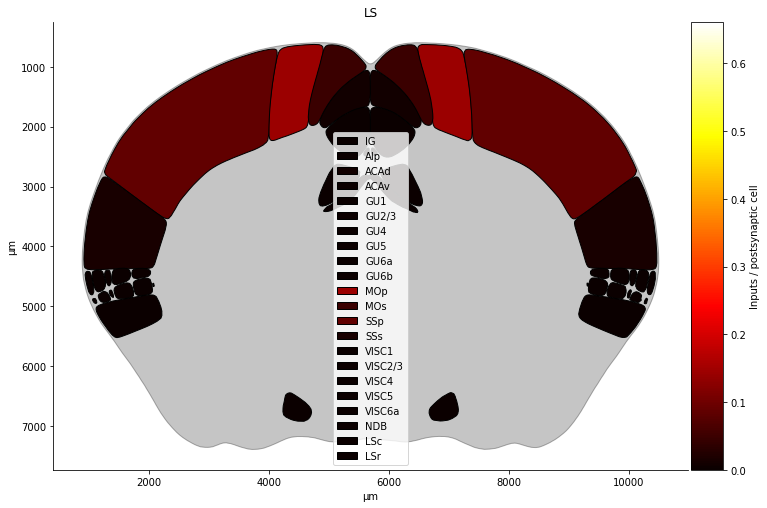

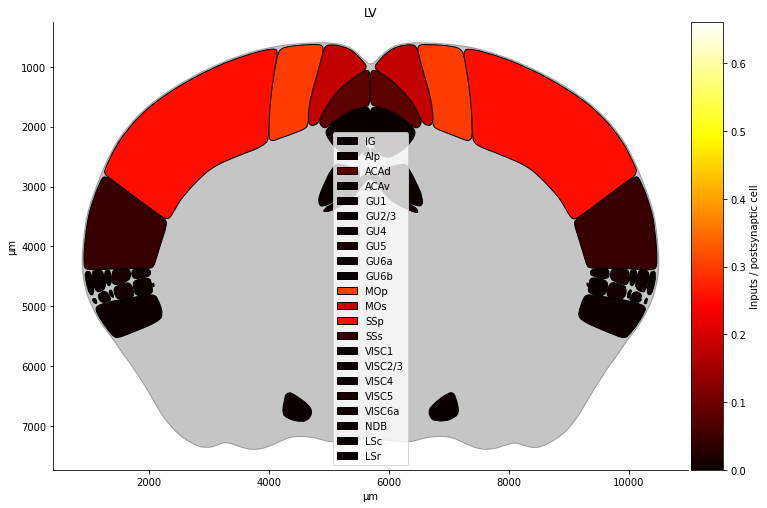

In [15]:
btp.generate_slice_heatmap(position=5500, normalisation='postsynaptics', depth=7)
# show heatmap of areas by depth in inheritance tree (frequently crashes)

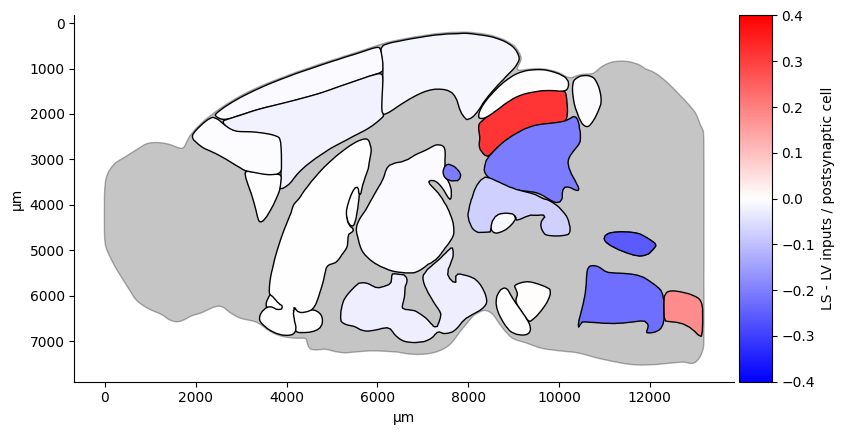

In [31]:
btp.generate_heatmap_difference(areas_6100, orientation='sagittal', position=6100, normalisation='postsynaptics', legend=False, limit=0.4)
#btf.save('heatmap_differences_absolute', as_type='png')
# show difference heatmap across groups

[0.]


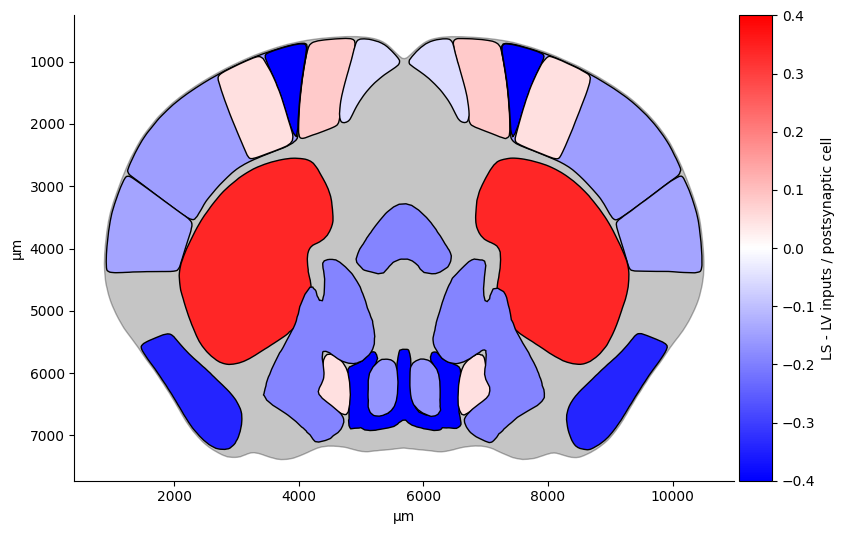

In [7]:
btp.generate_heatmap_ratios(ctx, orientation='frontal', position=5500, normalisation='postsynaptics', legend=False, limit=0.4)
# show ratio difference heatmap across groups

## Statistics

In [5]:
bt.mwu('SS')

MannwhitneyuResult(statistic=20.0, pvalue=0.13879062114356233)

In [8]:
areas = ['VTA','SCm','TH']
bt.anova(areas)

  Area Dataset     Cells
0  VTA      LS  0.008734
1  SCm      LS  0.519651
2   TH      LS  0.270742
3  VTA      LS  0.000000
4  SCm      LS  0.299213
  Area Dataset  Cells
0  VTA      LS   11.0
1  SCm      LS   45.0
2   TH      LS   35.0
3  VTA      LS    2.5
4  SCm      LS   37.0


,sum_sq,df,F,PR(>F)
C(Area),6865.764706,2.0,43.748232,1.860348e-11
C(Dataset),491.189815,1.0,6.259663,1.589043e-02
Residual,3688.045479,47.0,NaN,NaN
